# Lab 1:  Data handling and preprocessing

The majority of data that we encounter are organised in tables. A very common way of storing a table is a **dataframe**. And the standard package of python for dataframes is called **pandas**.

In pandas, there are two main data structures. The **DataFrame** class (for 2D tables) and the **Series** class (for 1D vectors).

## Loading and displaying data
Let us start with an example of data from breast cancer patients.
(A public dataset that was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia)

The following command loads the CSV file in a pandas DataFrame and displays it.

Each line of the table represents the data of a patient.
The columns contain the different attributes (variables/features).
Note that the lines and the columns have labels (marked in bold face). 
The labels of the lines (here: 0..285) are called **index**.

Each column contains data of the same type, but different columns can have different types. 
For example, `deg-malig` is a **numerical** (or quantitative) variable and `menopause` is a **categorical** (or qualitative) variable.

Here, we are dealing with a (binary) classification problem. The class to predict is stored in the first column.
The two classes are `no-recurrence-event` and `recurrence-events`.


### Question 1.1
What is the type of each column/attribute?

### Question 1.2
How to represent the categorical variables in numerical form?


In [2]:
import sys
!{sys.executable} -m pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

bc = pd.read_csv("breast-cancer/breast-cancer.csv")
bc

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breat-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


## Slicing and filtering

We will load another dataset that contains the frequency of first names given to babys born between 1880 and 2012 in the USA.

In [4]:
bn = pd.read_csv("babynames.csv")
bn

,year,sex,name,count,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888
...,...,...,...,...,...
265872,2012,M,Gilbert,198,0.000099
265873,2012,M,Jaylon,198,0.000099
265874,2012,M,Kylen,198,0.000099
265875,2012,M,Augustine,197,0.000098


A slice is a DataFrame that contains a selection of lines or columns of the original DataFrame. 
We can select by label with **loc** or by index **iloc**.
Here the line labels are numbers but it could as well be names (as for the columns).

Syntax: 
```
dataframe.loc[row_label, column_label] ou
dataframe.loc[row_label] ou 
dataframe[row_label] ou alors
dataframe.row_label

dataframe.iloc[row, column] ou
dataframe.iloc[row]
```
### Question 2.1
What do the following commands?

In [5]:
bn.loc[3, "name"]

'Elizabeth'

In [6]:
bn.loc[3, ["name", "count"]]

name     Elizabeth
count         1939
Name: 3, dtype: object

In [7]:
bn.loc[0:10, "name":"prop"]

,name,count,prop
0,Mary,7065,0.072384
1,Anna,2604,0.026679
2,Emma,2003,0.020521
3,Elizabeth,1939,0.019866
4,Minnie,1746,0.017888
5,Margaret,1578,0.016167
6,Ida,1472,0.015081
7,Alice,1414,0.014487
8,Bertha,1320,0.013524
9,Sarah,1288,0.013196


In [8]:
bn.loc[0:3, ["name"]]

,name
0,Mary
1,Anna
2,Emma
3,Elizabeth


In [9]:
bn.loc[:,"name"]

0              Mary
1              Anna
2              Emma
3         Elizabeth
4            Minnie
            ...    
265872      Gilbert
265873       Jaylon
265874        Kylen
265875    Augustine
265876      Dangelo
Name: name, Length: 265877, dtype: object

In [10]:
# Shorter alternative
bn["name"]

0              Mary
1              Anna
2              Emma
3         Elizabeth
4            Minnie
            ...    
265872      Gilbert
265873       Jaylon
265874        Kylen
265875    Augustine
265876      Dangelo
Name: name, Length: 265877, dtype: object

In [11]:
# Or
bn.name

0              Mary
1              Anna
2              Emma
3         Elizabeth
4            Minnie
            ...    
265872      Gilbert
265873       Jaylon
265874        Kylen
265875    Augustine
265876      Dangelo
Name: name, Length: 265877, dtype: object

In [12]:
bn.loc[14375]
# or bn.iloc[14375]

year         1887
sex             F
name       Amalia
count          20
prop     0.000129
Name: 14375, dtype: object

In [13]:
bn.iloc[2,3]

np.int64(2003)

In [14]:
bn.iloc[:, 2:4]

,name,count
0,Mary,7065
1,Anna,2604
2,Emma,2003
3,Elizabeth,1939
4,Minnie,1746
...,...,...
265872,Gilbert,198
265873,Jaylon,198
265874,Kylen,198
265875,Augustine,197


In [15]:
bn.iloc[-5:]

,year,sex,name,count,prop
265872,2012,M,Gilbert,198,0.000099
265873,2012,M,Jaylon,198,0.000099
265874,2012,M,Kylen,198,0.000099
265875,2012,M,Augustine,197,0.000098
265876,2012,M,Dangelo,197,0.000098


Very often, we want to filter a subset of the data (lines) according to a certain criterion.
For example, the most popular first names in 2012.

In [16]:
bn["year"]

0         1880
1         1880
2         1880
3         1880
4         1880
          ... 
265872    2012
265873    2012
265874    2012
265875    2012
265876    2012
Name: year, Length: 265877, dtype: int64

In [17]:
# Alternative
bn.year

0         1880
1         1880
2         1880
3         1880
4         1880
          ... 
265872    2012
265873    2012
265874    2012
265875    2012
265876    2012
Name: year, Length: 265877, dtype: int64

In [18]:
bn["year"]==2012

0         False
1         False
2         False
3         False
4         False
          ...  
265872     True
265873     True
265874     True
265875     True
265876     True
Name: year, Length: 265877, dtype: bool

We can index a DataFrame by giving this `Series`of booleans as an argument to `loc`.

In [19]:
bn.loc[bn["year"]==2012, :]

,year,sex,name,count,prop
263877,2012,F,Sophia,22158,0.011531
263878,2012,F,Emma,20791,0.010820
263879,2012,F,Isabella,18931,0.009852
263880,2012,F,Olivia,17147,0.008923
263881,2012,F,Ava,15418,0.008024
...,...,...,...,...,...
265872,2012,M,Gilbert,198,0.000099
265873,2012,M,Jaylon,198,0.000099
265874,2012,M,Kylen,198,0.000099
265875,2012,M,Augustine,197,0.000098


In [20]:
# Shortcut
bn[bn["year"]==2012]

,year,sex,name,count,prop
263877,2012,F,Sophia,22158,0.011531
263878,2012,F,Emma,20791,0.010820
263879,2012,F,Isabella,18931,0.009852
263880,2012,F,Olivia,17147,0.008923
263881,2012,F,Ava,15418,0.008024
...,...,...,...,...,...
265872,2012,M,Gilbert,198,0.000099
265873,2012,M,Jaylon,198,0.000099
265874,2012,M,Kylen,198,0.000099
265875,2012,M,Augustine,197,0.000098


### Question 2.2
Sort the result according to the "count" column in descending order

In [21]:
bn.sort_values(by='count', ascending=False)

,year,sex,name,count,prop
133877,1947,F,Linda,99685,0.054838
135877,1948,F,Linda,96178,0.055205
134877,1947,M,James,94743,0.051009
154877,1957,M,Michael,92705,0.042380
134878,1947,M,Robert,91645,0.049341
...,...,...,...,...,...
19870,1889,M,Chesley,5,0.000042
19871,1889,M,Chin,5,0.000042
19872,1889,M,Claiborne,5,0.000042
19873,1889,M,Cleave,5,0.000042


### Question 2.3
Add another criterion (with '&') saying that we only want female names. Sort the results according to "count" in descending order and display only the first 10 lines.

In [22]:
bn.loc[bn['sex']=='F'].sort_values(by='count', ascending=False).head(10)

,year,sex,name,count,prop
133877,1947,F,Linda,99685,0.054838
135877,1948,F,Linda,96178,0.055205
137877,1949,F,Linda,90986,0.051845
139877,1950,F,Linda,80437,0.045729
81877,1921,F,Mary,73983,0.057817
141877,1951,F,Linda,73884,0.040038
87877,1924,F,Mary,73513,0.056738
83877,1922,F,Mary,72167,0.057851
133878,1947,F,Mary,71680,0.039432
85877,1923,F,Mary,71630,0.057196


### Question 2.4
Display the frequency of the first name Sophia over the years.

In [23]:
bn.loc[bn['name'] == 'Sophia'].sort_values(by='year', ascending=True)

,year,sex,name,count,prop
117,1880,F,Sophia,138,0.001414
2072,1881,F,Sophia,122,0.001234
3992,1882,F,Sophia,179,0.001547
6005,1883,F,Sophia,159,0.001324
8011,1884,F,Sophia,170,0.001236
...,...,...,...,...,...
255883,2008,F,Sophia,16064,0.007729
257880,2009,F,Sophia,16909,0.008373
259878,2010,F,Sophia,20589,0.010538
261877,2011,F,Sophia,21780,0.011293


### Question 2.5
Display all the first names that have been given more than 80000 times in a year.

In [24]:
bn.loc[bn['count'] > 80000].sort_values(by='year', ascending=True)

,year,sex,name,count,prop
126877,1943,M,James,80236,0.055183
132877,1946,M,James,87432,0.052990
132878,1946,M,Robert,84121,0.050983
133877,1947,F,Linda,99685,0.054838
134877,1947,M,James,94743,0.051009
...,...,...,...,...,...
172877,1966,M,Michael,80008,0.044009
174877,1967,M,Michael,82455,0.046323
176877,1968,M,Michael,82027,0.046179
178877,1969,M,Michael,85226,0.046559


### Question 2.6
Same question but display the first names without duplicates (by using the method: `unique()`).


In [25]:
bn.loc[bn['count'] > 80000, 'name'].unique()

array(['James', 'Robert', 'Linda', 'John', 'Michael', 'David'],
      dtype=object)

### Question 2.7
Display all female first names that are very rare (proportion < 0.01%).

In [26]:
bn.loc[(bn['prop']<0.01) & (bn['sex']=='F')]

,year,sex,name,count,prop
19,1880,F,Carrie,949,0.009723
20,1880,F,Maude,858,0.008791
21,1880,F,Mabel,808,0.008278
22,1880,F,Bessie,796,0.008155
23,1880,F,Jennie,793,0.008125
...,...,...,...,...,...
264872,2012,F,Sofie,252,0.000131
264873,2012,F,Tess,252,0.000131
264874,2012,F,Ashtyn,251,0.000131
264875,2012,F,Jessa,251,0.000131


### Question 2.8
Analyse the evolution of the popularity of the first name "Luna" over the years.

In [27]:
bn.loc[bn['name']=='Luna'].sort_values(by="year", ascending=True)

,year,sex,name,count,prop
443,1880,F,Luna,15,0.000154
2344,1881,F,Luna,18,0.000182
6350,1883,F,Luna,17,0.000142
8368,1884,F,Luna,18,0.000131
10443,1885,F,Luna,15,0.000106
12378,1886,F,Luna,20,0.000130
14359,1887,F,Luna,22,0.000142
16396,1888,F,Luna,24,0.000127
18469,1889,F,Luna,19,0.000100
20421,1890,F,Luna,24,0.000119


## Aggregation

As we can do with SQL and databases, we can aggregate lines and apply aggregation functions such as min, max, count, sum...

For example, to compute the sum of all births:

In [28]:
bn["count"].sum()

np.int64(302015867)

Grouped by year:

In [29]:
births_per_year = bn.groupby("year")["count"].sum()
births_per_year

year
1880     201194
1881     192701
1882     220902
1883     216532
1884     241959
         ...   
2008    3127240
2009    3021739
2010    2915330
2011    2882703
2012    2863986
Name: count, Length: 133, dtype: int64

The years are now the index of the DataFrame. 
If we want to reinitialise the index, we can do the following command:

In [30]:
bpy = births_per_year.reset_index()
bpy

,year,count
0,1880,201194
1,1881,192701
2,1882,220902
3,1883,216532
4,1884,241959
...,...,...
128,2008,3127240
129,2009,3021739
130,2010,2915330
131,2011,2882703


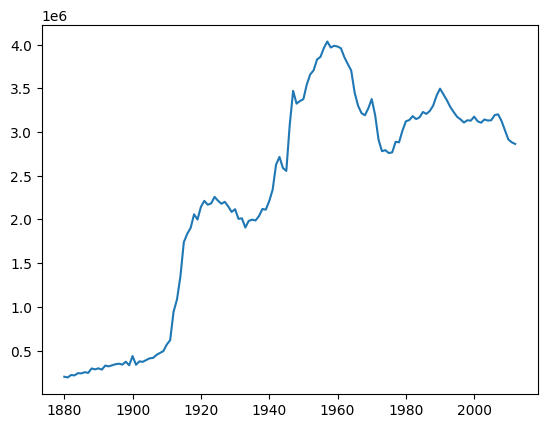

In [31]:
# Plot
plt.plot(bpy["year"], bpy["count"])

We can also group by several attributes by giving a list as parameter to `groupby()`.

In [32]:
births_per_year_and_sex = bn.groupby(["year", "sex"])["count"].sum()
births_per_year_and_sex

year  sex
1880  F        90993
      M       110201
1881  F        91955
      M       100746
1882  F       107710
              ...   
2010  M      1611151
2011  F      1290155
      M      1592548
2012  F      1283988
      M      1579998
Name: count, Length: 266, dtype: int64

In [33]:
# Converted to DataFrame
births_per_year_and_sex.to_frame()

count
year sex         
1880 F      90993
     M     110201
1881 F      91955
     M     100746
1882 F     107710
...           ...
2010 M    1611151
2011 F    1290155
     M    1592548
2012 F    1283988
     M    1579998

[266 rows x 1 columns]

In [34]:
# With reinitialised index 
bpys = births_per_year_and_sex.reset_index()
bpys

,year,sex,count
0,1880,F,90993
1,1880,M,110201
2,1881,F,91955
3,1881,M,100746
4,1882,F,107710
...,...,...,...
261,2010,M,1611151
262,2011,F,1290155
263,2011,M,1592548
264,2012,F,1283988


It can be useful to "pivot" the table and put each sex in a separate column.

In [35]:
pivot = pd.pivot_table(bpys, columns="sex", values="count", index="year")
pivot

sex,F,M
year,,
1880,90993.0,110201.0
1881,91955.0,100746.0
1882,107710.0,113192.0
1883,112052.0,104480.0
1884,128139.0,113820.0
...,...,...
2008,1397422.0,1729818.0
2009,1350195.0,1671544.0
2010,1304179.0,1611151.0


### Question 2.9
Study (visually) during which period and for which sex there have been more births.

In [36]:
births_per_sex_and_year = bn.groupby(['sex', 'year'])['count'].sum()
births_per_sex_and_year

sex  year
F    1880      90993
     1881      91955
     1882     107710
     1883     112052
     1884     128139
              ...   
M    2008    1729818
     2009    1671544
     2010    1611151
     2011    1592548
     2012    1579998
Name: count, Length: 266, dtype: int64

In [37]:
births_per_sex_and_year.to_frame()
bpsy = births_per_sex_and_year.reset_index()
bpsy

,sex,year,count
0,F,1880,90993
1,F,1881,91955
2,F,1882,107710
3,F,1883,112052
4,F,1884,128139
...,...,...,...
261,M,2008,1729818
262,M,2009,1671544
263,M,2010,1611151
264,M,2011,1592548


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/pyplot.py'>

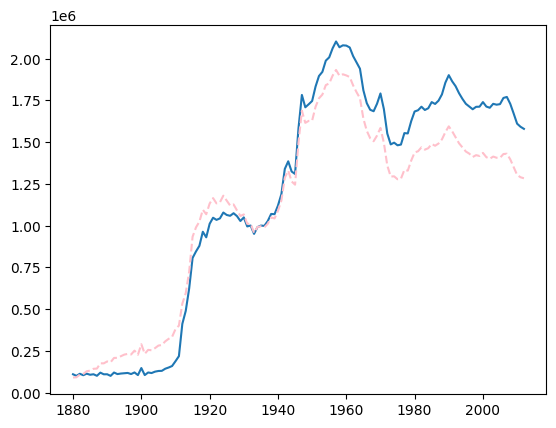

In [38]:
bmpy = bpsy.loc[bpsy['sex']=='M']
bfpy = bpsy.loc[bpsy['sex']=='F']

plt.plot(bmpy["year"], bmpy["count"])
plt.plot(bfpy["year"], bfpy["count"], color='pink', linestyle='--')
plt

### Question 2.10
Analyse for each first name the statistics (min, max, moyenne etc.) of the number of births over all years.
(You can use the function `describe`.)

In [39]:
bn.describe()

,year,count,prop
count,265877.000000,265877.000000,265877.000000
mean,1946.030288,1135.923254,0.000890
std,38.375818,3958.333079,0.002978
min,1880.000000,5.000000,0.000026
25%,1913.000000,73.000000,0.000083
50%,1946.000000,211.000000,0.000168
75%,1979.000000,641.000000,0.000514
max,2012.000000,99685.000000,0.081546


## Other operations

Convert the numerical data into a **numpy ndarray**.

In [40]:
bn.prop.to_numpy()

array([7.23835869e-02, 2.66789611e-02, 2.05214897e-02, ...,
       9.85252561e-05, 9.80276538e-05, 9.80276538e-05], shape=(265877,))

Add a new column (with the length of each first name).

In [41]:
bn = bn.assign(nb_letters = bn["name"].str.len())
bn

,year,sex,name,count,prop,nb_letters
0,1880,F,Mary,7065,0.072384,4
1,1880,F,Anna,2604,0.026679,4
2,1880,F,Emma,2003,0.020521,4
3,1880,F,Elizabeth,1939,0.019866,9
4,1880,F,Minnie,1746,0.017888,6
...,...,...,...,...,...,...
265872,2012,M,Gilbert,198,0.000099,7
265873,2012,M,Jaylon,198,0.000099,6
265874,2012,M,Kylen,198,0.000099,5
265875,2012,M,Augustine,197,0.000098,9


Transform a categorical attribute into a numerical one (factorize).

In [42]:
bn.sex.factorize()


(array([0, 0, 0, ..., 1, 1, 1], shape=(265877,)),
 Index(['F', 'M'], dtype='object'))

In [43]:
bn.sex.factorize()[0]

array([0, 0, 0, ..., 1, 1, 1], shape=(265877,))

In [44]:
bn.sex = bn.sex.factorize()[0]
bn

,year,sex,name,count,prop,nb_letters
0,1880,0,Mary,7065,0.072384,4
1,1880,0,Anna,2604,0.026679,4
2,1880,0,Emma,2003,0.020521,4
3,1880,0,Elizabeth,1939,0.019866,9
4,1880,0,Minnie,1746,0.017888,6
...,...,...,...,...,...,...
265872,2012,1,Gilbert,198,0.000099,7
265873,2012,1,Jaylon,198,0.000099,6
265874,2012,1,Kylen,198,0.000099,5
265875,2012,1,Augustine,197,0.000098,9


Remove (drop) a column.

In [45]:
bn = bn.drop("nb_letters", axis=1)
bn

,year,sex,name,count,prop
0,1880,0,Mary,7065,0.072384
1,1880,0,Anna,2604,0.026679
2,1880,0,Emma,2003,0.020521
3,1880,0,Elizabeth,1939,0.019866
4,1880,0,Minnie,1746,0.017888
...,...,...,...,...,...
265872,2012,1,Gilbert,198,0.000099
265873,2012,1,Jaylon,198,0.000099
265874,2012,1,Kylen,198,0.000099
265875,2012,1,Augustine,197,0.000098


We can apply a function to each element of a column with **apply()**.

Example: length of first names

In [46]:
bn["name"].apply(len)

0         4
1         4
2         4
3         9
4         6
         ..
265872    7
265873    6
265874    5
265875    9
265876    7
Name: name, Length: 265877, dtype: int64

Other example: extract the first letter of each first name.

In [47]:
def first_letter(string):
    return string[0]

bn["name"].apply(first_letter)

0         M
1         A
2         E
3         E
4         M
         ..
265872    G
265873    J
265874    K
265875    A
265876    D
Name: name, Length: 265877, dtype: object

### Question 2.11
Add the result of this operation as a new column in our DataFrame and analyse the evolution of the frequence of first names that start with the letter "L".

In [49]:
bn = bn.assign(first_letter=bn['name'].apply(first_letter))
bn

0         M
1         A
2         E
3         E
4         M
         ..
265872    G
265873    J
265874    K
265875    A
265876    D
Name: first_letter, Length: 265877, dtype: object

In [52]:
bnfl = bn.groupby(['first_letter', 'year'])['count'].sum()
bnfl

first_letter  year
A             1880    16740
              1881    16257
              1882    18790
              1883    18831
              1884    20818
                      ...  
Z             2008    29314
              2009    29206
              2010    31010
              2011    32266
              2012    33601
Name: count, Length: 3391, dtype: int64

In [54]:
bnfl.to_frame()
bnfli = bnfl.reset_index()
bnfli

,first_letter,year,count
0,A,1880,16740
1,A,1881,16257
2,A,1882,18790
3,A,1883,18831
4,A,1884,20818
...,...,...,...
3386,Z,2008,29314
3387,Z,2009,29206
3388,Z,2010,31010
3389,Z,2011,32266


In [56]:
l_bnfli = bnfli.loc[bnfli['first_letter']=='L']
l_bnfli

,first_letter,year,count
1463,L,1880,12769
1464,L,1881,12770
1465,L,1882,14848
1466,L,1883,15106
1467,L,1884,16618
...,...,...,...
1591,L,2008,169072
1592,L,2009,174875
1593,L,2010,180636
1594,L,2011,182654


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/pyplot.py'>

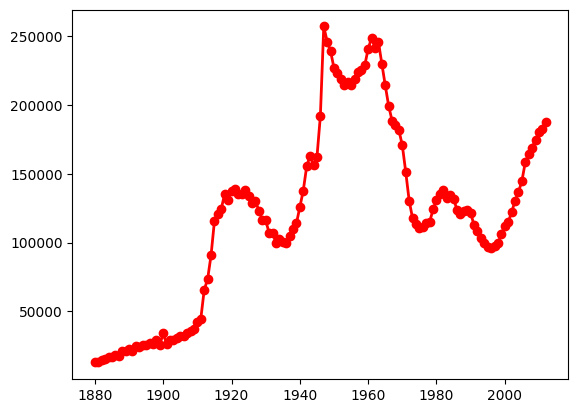

In [57]:
plt.plot(l_bnfli['year'], l_bnfli['count'], color='red', linestyle='-', linewidth=2, marker='o', label=f'evolution of the frequence of first names that start with the letter "L"')
plt

## Processing and cleaning of $CO_2$ measurement data

In reality, you will rarely have such "clean" data and in a format that is suitable for direct analysis with python and pandas or numpy.

We will now work on another dataset that contains $CO_2$ concentration measurements in the air.
They come from the "Mauna Loa" observatory (Hawai) of the "National Oceanic and Atmospheric Administration" (NOAA).

### Question 3.1
Open the file "co2_mm_mlo2.txt" with a text editor. 
And then load the file (or the modified file) into a pandas DataFrame.

In [69]:
co2_measures = pd.read_csv(
    "co2_mm_mlo2.txt",
    comment="#",           # ignore all comment lines
    sep=r"\s+",                  # split on variable whitespace
    engine="python",             # for regex parsing
    names=[
        "year","month","decimal_date", "monthly_average", "de_seasonalized",
        "days", "std_dev", "uncertainty"
    ],
    na_values=["-99.99", "-9"]  # treat missing codes as NaN
)
co2_measures.head(10)

,year,month,decimal_date,monthly_average,de_seasonalized,days,std_dev,uncertainty
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
5,1958,8,1958.6219,314.93,316.18,-1,-9.99,-0.99
6,1958,9,1958.7068,313.20,316.08,-1,-9.99,-0.99
7,1958,10,1958.7890,312.43,315.41,-1,-9.99,-0.99
8,1958,11,1958.8740,313.33,315.20,-1,-9.99,-0.99
9,1958,12,1958.9562,314.67,315.43,-1,-9.99,-0.99


In [ ]:
co2_measures.describe()

In [70]:
co2_measures.describe()

,year,month,decimal_date,monthly_average,de_seasonalized,days,std_dev,uncertainty
count,782.000000,782.000000,782.000000,773.000000,773.000000,782.000000,782.000000,782.000000
mean,1990.869565,6.512788,1991.370036,359.613972,359.620142,18.984655,-2.021266,-0.092187
std,18.897415,3.456955,18.898330,31.163014,31.108578,12.091087,4.489115,0.506859
min,1958.000000,1.000000,1958.202700,312.430000,314.430000,-1.000000,-9.990000,-0.990000
25%,1975.000000,4.000000,1975.145825,331.500000,331.330000,-0.250000,0.200000,0.000000
50%,1991.000000,6.500000,1991.416650,355.860000,356.360000,25.000000,0.400000,0.150000
75%,2007.000000,10.000000,2007.687475,384.730000,384.720000,28.000000,0.570000,0.210000
max,2023.000000,12.000000,2023.958300,424.000000,422.580000,31.000000,1.310000,0.580000


### Question 3.2
Display the evolution of the monthly average of $CO_2$ measures over time. What do you observe?

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/pyplot.py'>

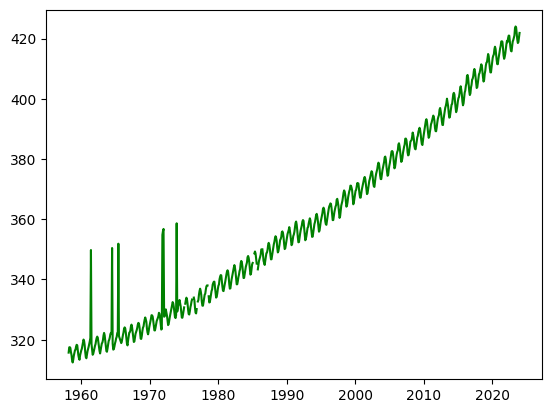

In [71]:
plt.plot(co2_measures['decimal_date'], co2_measures['monthly_average'], color='green', linestyle='-', label=f'evolution of the monthly average of  measures over time')
plt

### Question 3.3
Verify that there are all data (12 per year) and that they are consistent.

---
If there are missing data they can have an important negative impact on our analysis.
They can distort our results and, in the worst case, change our conclusions and our decisions.
Therefore, it is important to cope with them appropriately.

Once we have identified the missing or erroneous values, there are several ways to proceed:
1. we remove these lines from the table
2. we replace them with "NaN" (Not a Number, "pandas.NA") or a "neutral" value that does not have too much impact on the analysis ("0" or the mean or we repeat the value before/after) 
3. we do an interpolation between the neighbouring data (for example, before and after). 

![](addressing_missing_values.png)

These methods are supposed to decrease the error of the model but, in general, each of them brings its own imprecision or biais depending on the nature of the data.


In [72]:
monthly_counts = co2_measures.groupby("year")["month"].count()

# Display years with missing months (less than 12)
missing_years = monthly_counts[monthly_counts < 12]
print("Years with missing months:\n", missing_years)

Years with missing months:
 year
1958    10
1960    10
1961    11
1962    10
1965     9
Name: month, dtype: int64


### Question 3.3
Create three copies from our DataFrame (mlo) with the three methods described above.

Note: you can create a copy of a DataFrame with the `copy()` method (example: `df2 = df.copy()`. 
For interpolation, use the function `DataFrame. interpolate()`.

In [79]:
# Copy 1 → Remove rows with missing values
mlo_drop = co2_measures.dropna(subset=["monthly_average"]).copy()

In [78]:
# Copy 2 → Replace missing values with a neutral value
mlo_fill = co2_measures.copy()
mlo_fill["monthly_average"] = mlo_fill["monthly_average"].fillna(co2_measures["monthly_average"].mean())

In [80]:
# Copy 3 → Interpolate missing values
mlo_interp = co2_measures.copy()
mlo_interp["monthly_average"] = mlo_interp["monthly_average"].interpolate()

In [81]:
print("NaNs remaining after drop:", mlo_drop["monthly_average"].isna().sum())
print("NaNs remaining after fill:", mlo_fill["monthly_average"].isna().sum())
print("NaNs remaining after interpolate:", mlo_interp["monthly_average"].isna().sum())

NaNs remaining after drop: 0
NaNs remaining after fill: 0
NaNs remaining after interpolate: 0


Another way for time series to obtain a continuous sequence (i.e. without holes) is to aggregate (average) the values over longer periods at the cost of a coarser granularity.
The underlying hypothesis is that there is at least one datum per period.

### Question 3.4
In the $CO_2$ example data, "remove" the missing data by aggregating per year.
Note: this removes also the seasonal variations (which may be desirable or not). 
Plot again the $CO_2$ concentration curve over time.


In [82]:
mlo_yearly = co2_measures.groupby("year", as_index=False)["monthly_average"].mean()
mlo_yearly

,year,monthly_average
0,1958,315.232000
1,1959,315.980833
2,1960,316.631000
3,1961,320.290000
4,1962,318.444000
...,...,...
61,2019,411.649167
62,2020,414.210833
63,2021,416.413333
64,2022,418.528333


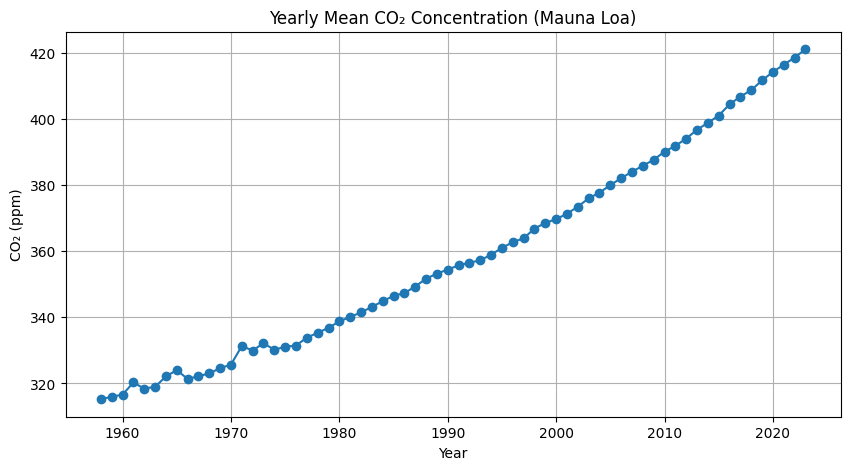

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(mlo_yearly["year"], mlo_yearly["monthly_average"], marker="o")
plt.title("Yearly Mean CO₂ Concentration (Mauna Loa)")
plt.xlabel("Year")
plt.ylabel("CO₂ (ppm)")
plt.grid(True)
plt.show()

## Bonus
Construct a model from the observations until 2010 and predict the CO2 values after 2010. Display prediction and real observations in the same plot and compute a metric that measures the quality of this prediction.

In [91]:
import sys
!{sys.executable} -m pip install scikit-learn

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 12.3 MB/s  0:00:00 eta 0:00:01
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


In [92]:
train = mlo_yearly[mlo_yearly["year"] <= 2010].copy()
test = mlo_yearly[mlo_yearly["year"] > 2010].copy()

In [93]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape for sklearn
X_train = train["year"].values.reshape(-1, 1)
y_train = train["monthly_average"].values

X_test = test["year"].values.reshape(-1, 1)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict CO2 for years after 2010
y_pred = model.predict(X_test)


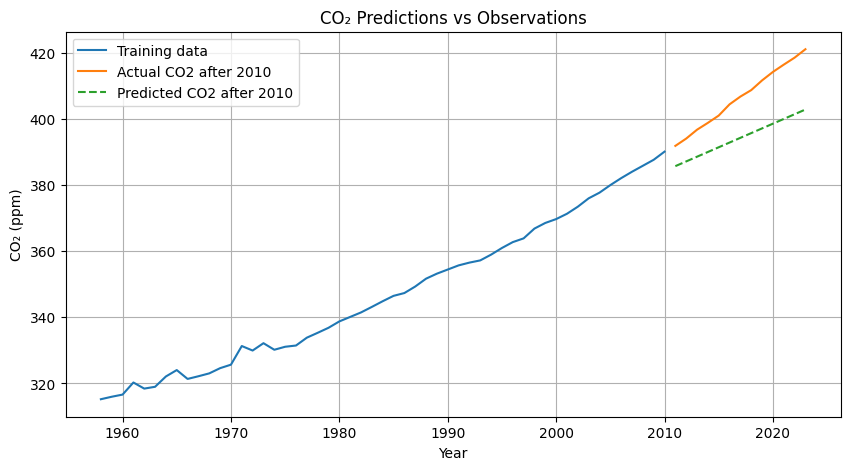

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(train["year"], train["monthly_average"], label="Training data")
plt.plot(test["year"], test["monthly_average"], label="Actual CO2 after 2010")
plt.plot(test["year"], y_pred, label="Predicted CO2 after 2010", linestyle="--")
plt.xlabel("Year")
plt.ylabel("CO₂ (ppm)")
plt.title("CO₂ Predictions vs Observations")
plt.legend()
plt.grid(True)
plt.show()

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test["monthly_average"], y_pred)
mse = mean_squared_error(test["monthly_average"], y_pred)

print(f"MAE = {mae:.2f} ppm")
print(f"MSE = {mse:.2f}")

MAE = 12.20 ppm
MSE = 163.84
